In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
#     print(module_path)
    sys.path.append("/Users/suyashsrivastava/")

# Training TinyVGG on Flowers17 With Regularization To Improve Accuracy 

#### Import Necessary Packages

In [41]:
from imutils import paths
from drig.preprocessors.preprocessors import ImageToArrayPreprocessor, UniformAspectPreprocessor
from drig.datasets.datasetloader import DatasetLoader
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from drig.networks.networks import TinyVGG
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from drig.utils import plot_training_metrics
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Load Images

In [42]:
image_paths=list(paths.list_images("../datasets/17flowers/"))
classes=[image_path.split("/")[-2] for image_path in image_paths]
classes=[str(label) for label in np.unique(classes)]

#### Load Preprocessors

In [43]:
uniform_aspect=UniformAspectPreprocessor(64, 64)
image_to_array=ImageToArrayPreprocessor()

#### Load Data

In [44]:
data_loader=DatasetLoader(preprocessors=[uniform_aspect, image_to_array])
data, labels= data_loader.load(image_paths, verbose=1)

Processed 1360/1360 Images.


#### Normalize Data

In [45]:
data=data.astype("float")/255.0

#### Split Data To Training & Testing Dataset

In [46]:
train_x, test_x, train_y, test_y= train_test_split(data, labels, test_size=0.25, random_state=42)

#### One-Hot Enccoded Labels

In [47]:
label_binarizer=LabelBinarizer()
train_y=label_binarizer.fit_transform(train_y)
test_y=label_binarizer.transform(test_y)

#### Initialise Image Data Generator Object

In [48]:
augmenter=ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

#### Build & Compile TinyVGG Model

In [49]:
opt=SGD(learning_rate=0.05)
model=TinyVGG.build(width=64, height=64, depth=3, classes=len(classes))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#### Traing Model With Augmented Data

In [50]:
epochs=100
Z=model.fit_generator(augmenter.flow(train_x, train_y, batch_size=32), validation_data=(test_x, test_y),
                     steps_per_epoch=len(train_x)//32, epochs=epochs, verbose=1)

/Users/suyashsrivastava/miniforge3/envs/dl4cv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
31/31 [==============================] - 3s 84ms/step - loss: 3.5414 - accuracy: 0.1369 - val_loss: 2.8769 - val_accuracy: 0.0676
Epoch 2/100
31/31 [==============================] - 2s 72ms/step - loss: 2.6213 - accuracy: 0.2773 - val_loss: 3.0185 - val_accuracy: 0.0735
Epoch 3/100
31/31 [==============================] - 2s 72ms/step - loss: 2.2309 - accuracy: 0.3259 - val_loss: 3.2056 - val_accuracy: 0.0529
Epoch 4/100
31/31 [==============================] - 2s 72ms/step - loss: 2.2484 - accuracy: 0.3814 - val_loss: 3.3432 - val_accuracy: 0.1235
Epoch 5/100
31/31 [==============================] - 2s 74ms/step - loss: 1.9158 - accuracy: 0.4101 - val_loss: 3.3486 - val_accuracy: 0.1118
Epoch 6/100
31/31 [==============================] - 2s 73ms/step - loss: 1.8128 - accuracy: 0.4584 - val_loss: 3.4920 - val_accuracy: 0.0912
Epoch 7/100
31/31 [==============================] - 2s 73ms/step - loss: 1.7945 - accuracy: 0.4577 - val_loss: 3.0048 - val_accuracy: 0.1235
Epoch 

#### Running Predictions

In [51]:
predictions=model.predict(test_x, batch_size=32)


#### Get Model Prediction Report

In [52]:
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1), target_names=classes))

              precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.54      0.75      0.63        20
          10       0.95      0.70      0.81        27
          11       0.54      0.65      0.59        20
          12       0.48      0.94      0.64        16
          13       0.80      0.44      0.57        18
          14       0.91      0.43      0.59        23
          15       0.81      0.85      0.83        20
          16       0.92      0.58      0.71        19
           2       1.00      0.56      0.71        18
           3       0.94      0.77      0.85        22
           4       0.41      1.00      0.58        20
           5       0.94      0.70      0.80        23
           6       0.80      0.95      0.87        21
           7       0.50      0.57      0.53        23
           8       0.92      0.75      0.83        16
           9       0.94      0.79      0.86        19

    accuracy              

#### Plot Model Training Metrics

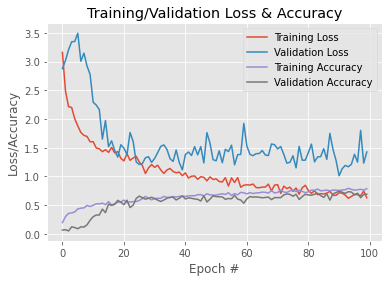

In [53]:
plot_training_metrics(epochs, Z)